In [2]:
import psycopg2
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import Voltus_Project_Nathan_Functions as functions

In [3]:
%load_ext autoreload
%autoreload 2
pd.options.display.max_rows = 100

# Initial Data Processing and EDA

In [4]:
# connecting to the server
conn = psycopg2.connect(
    database="interval_load_data",
    user='postgres',
    password='Onei9yepahShac0renga',
    host="test-interval-load-data.cwr8xr5dhgm1.us-west-2.rds.amazonaws.com",
    port="5432"
)

In [5]:
# querying the sites and their time period
site_df = pd.read_sql_query("SELECT site_id, \
                             MIN(interval_end) as time_start, \
                             MAX(interval_end) as time_end, \
                             (MAX(interval_end) - MIN(interval_end)) as series_length, \
                             COUNT(*) as interval_counts, \
                             AVG(interval_width) as mean_interval_width \
                             FROM intervals \
                             GROUP BY site_id;", conn)

In [6]:
# checking for nulls, only found for kWh
null_df = pd.read_sql_query('SELECT COUNT(*) as kWh_nulls \
                             FROM intervals \
                             WHERE "kWh" IS NULL;', conn)
null_df

,kwh_nulls
0,23


In [7]:
# vast majority of data has intervals of 15-minutes or 1-hour
# the 4 other will need to be looked at in more depth
site_df['mean_interval_width'].value_counts()

900.000000     270
3600.000000     93
996.322396       3
949.035874       1
Name: mean_interval_width, dtype: int64

In [8]:
# general inspection
site_df

,site_id,time_start,time_end,series_length,interval_counts,mean_interval_width
0,35f1db19-ab26-7f30-3451-971f053712f6,2015-05-15 05:00:00,2018-10-04 04:00:00,1237 days 23:00:00,118845,900.0
1,a05598bc-59ac-6697-0673-0e87e7ccc677,2018-06-01 05:15:00,2018-10-07 05:00:00,127 days 23:45:00,12288,900.0
2,b8ec0850-c5ce-1579-5438-8d1247f0ff16,2016-09-05 05:00:00,2018-09-07 04:00:00,731 days 23:00:00,17568,3600.0
3,b9ad1c9b-fbe2-f36f-ab2a-6894c251433f,2018-08-17 07:15:00,2018-09-01 07:00:00,14 days 23:45:00,1056,900.0
4,61ff3699-aad4-35d3-4ecb-b8195e8b08cd,2015-01-01 05:00:00,2018-10-22 04:00:00,1389 days 23:00:00,133434,900.0
...,...,...,...,...,...,...
362,debc4593-d7e7-c1ae-f268-f6944c531e3f,2015-05-15 05:00:00,2018-10-12 04:00:00,1245 days 23:00:00,119452,900.0
363,8a2629e5-183b-05c3-7544-5ac89ee3c347,2018-05-04 05:00:00,2018-10-12 04:00:00,160 days 23:00:00,15453,900.0
364,811effd3-85a7-f36f-5eeb-cb38de38d5ac,2017-06-21 04:15:00,2018-10-12 04:00:00,477 days 23:45:00,45888,900.0
365,a85566bd-7cea-eb51-6aa5-912ee6bdd7d7,2015-05-15 05:00:00,2018-10-12 04:00:00,1245 days 23:00:00,119505,900.0


In [131]:
site_df.sort_values('series_length').head(100)

,site_id,time_start,time_end,series_length,interval_counts,mean_interval_width
200,5cca460f-ace3-6061-82c9-a548171ce604,2018-07-24 05:00:00,2018-07-25 04:00:00,0 days 23:00:00,24,3600.0
248,bb055294-2785-65c5-d0c3-682d88f20e03,2018-07-24 05:00:00,2018-07-25 04:00:00,0 days 23:00:00,24,3600.0
247,21e4f4d5-363b-14bd-a730-9d435d74d606,2018-07-24 05:00:00,2018-07-25 04:00:00,0 days 23:00:00,24,3600.0
243,39138f01-5443-f532-6462-736c6dcc10e8,2018-07-24 05:00:00,2018-07-25 04:00:00,0 days 23:00:00,24,3600.0
223,8dd2fc1b-0874-7462-b589-7ad334248d13,2018-07-24 05:00:00,2018-07-25 04:00:00,0 days 23:00:00,24,3600.0
46,1deddf70-b77f-b861-3717-95daa14c2ddd,2018-07-24 05:00:00,2018-07-25 04:00:00,0 days 23:00:00,24,3600.0
48,0101ee7c-a0ef-7b94-f62b-594142c8b0e6,2018-07-24 05:00:00,2018-07-25 04:00:00,0 days 23:00:00,24,3600.0
212,914a4622-8135-e1af-b78d-27324b8a2283,2018-07-24 05:00:00,2018-07-25 04:00:00,0 days 23:00:00,24,3600.0
311,aa836c84-561a-8a2a-aa0f-708f7b40ea21,2018-07-24 05:00:00,2018-07-25 04:00:00,0 days 23:00:00,24,3600.0
199,3747c7dc-e13d-8cc1-a12b-8af1ad992d6e,2018-07-24 05:00:00,2018-07-25 04:00:00,0 days 23:00:00,24,3600.0


In [145]:
# the smaller time series will need to be accommodated
np.sort(site_df['interval_counts'].unique())

array([    24,   1056,   1536,   1629,   3048,   3672,   4893,   5952,
         7488,   7630,   8086,   8160,   8424,   8757,   8758,   8926,
         8998,   9094,   9430,   9478,   9622,   9646,  10078,  10174,
        10294,  10678,  10750,  10774,  10798,  10822,  10918,  10966,
        10990,  11014,  11277,  12288,  13623,  14304,  15069,  15453,
        15584,  17194,  17376,  17540,  17568,  18286,  18393,  18456,
        18840,  18946,  18948,  18954,  18960,  19030,  19032,  19423,
        19526,  21116,  21743,  21829,  22516,  23663,  24300,  30471,
        33021,  35592,  36328,  38012,  45888,  60468,  62393,  65800,
        71360,  74112,  74905,  82491,  82647,  82677,  82679,  82686,
        82692,  82695,  82703,  82704,  82711,  82712,  82714,  82740,
        82743,  82747,  82842,  89899,  95066,  95901,  97396,  97437,
       115860, 117551, 118743, 118845, 119319, 119415, 119416, 119447,
       119449, 119452, 119453, 119454, 119455, 119457, 119461, 119465,
      

In [9]:
# checking for nulls and confirming datatypes
site_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   site_id              367 non-null    object         
 1   time_start           367 non-null    datetime64[ns] 
 2   time_end             367 non-null    datetime64[ns] 
 3   series_length        367 non-null    timedelta64[ns]
 4   interval_counts      367 non-null    int64          
 5   mean_interval_width  367 non-null    float64        
dtypes: datetime64[ns](2), float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 17.3+ KB


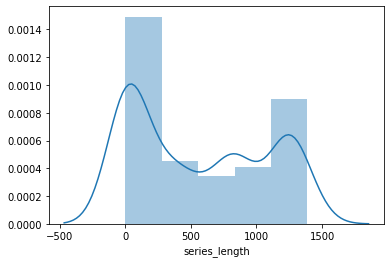

In [10]:
# inspecting the distribution in time series length in days
sns.distplot(site_df['series_length'].dt.days)

In [11]:
# checking for any really small time series and it looks like one might not have enough data to evaluate
# some only have a day of data, but at least you can check that day for start/stop, DR and gaps
site_df['series_length'].sort_values().head()

78    00:00:00
317   23:00:00
213   23:00:00
25    23:00:00
140   23:00:00
Name: series_length, dtype: timedelta64[ns]

In [12]:
# This site only has a single data point, so it will be excluded from further analysis
site_check = pd.read_sql_query("SELECT * \
                               FROM intervals \
                               WHERE site_id='44236c0b-b566-0af2-6675-6854fa9378dd';", conn)
site_check

,kWh,interval_end,interval_width,site_id
0,98.142,2018-08-20 05:15:00,900,44236c0b-b566-0af2-6675-6854fa9378dd


In [13]:
site_df.drop(78, inplace=True)
site_df.reset_index(drop=True, inplace=True)
site_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   site_id              366 non-null    object         
 1   time_start           366 non-null    datetime64[ns] 
 2   time_end             366 non-null    datetime64[ns] 
 3   series_length        366 non-null    timedelta64[ns]
 4   interval_counts      366 non-null    int64          
 5   mean_interval_width  366 non-null    float64        
dtypes: datetime64[ns](2), float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 17.3+ KB


In [14]:
# I want to look closer at the sites with unexpected interval lengths
odd_intervals = list(site_df.loc[(site_df['mean_interval_width'] != 900)
                                 & (site_df['mean_interval_width'] != 3600)]['site_id'])

# There is a pattern here where these four sites have 1296 1-hour intervals covering the same period of time.
# Any future algorithms will need to be able to account for this.
for odd_site in odd_intervals:
    interval_check = pd.read_sql_query(f"SELECT * \
                                        FROM intervals \
                                        WHERE site_id='{odd_site}';", conn)
    hour_time_start = interval_check.loc[interval_check['interval_width'] == 3600]['interval_end'].min()
    hour_time_end = interval_check.loc[interval_check['interval_width'] == 3600]['interval_end'].max()
    print(odd_site)
    print(interval_check['interval_width'].value_counts())
    print('Hourly data starts at ',hour_time_start)
    print('Hourly data ends at ',hour_time_end)

e7d819a2-4382-e7d1-a267-069c96a54333
900     35032
3600     1296
Name: interval_width, dtype: int64
Hourly data starts at  2018-09-01 09:00:00
Hourly data ends at  2018-10-25 08:00:00
871f9fba-e8c7-cdcd-1ac4-863509f1be51
900     35032
3600     1296
Name: interval_width, dtype: int64
Hourly data starts at  2018-09-01 09:00:00
Hourly data ends at  2018-10-25 08:00:00
66e9c85d-6b5f-d012-4b56-f69218073f86
900     70064
3600     1296
Name: interval_width, dtype: int64
Hourly data starts at  2018-09-01 09:00:00
Hourly data ends at  2018-10-25 08:00:00
cb846659-8aa0-3233-6b11-6745474c94c3
900     35032
3600     1296
Name: interval_width, dtype: int64
Hourly data starts at  2018-09-01 09:00:00
Hourly data ends at  2018-10-25 08:00:00


In [15]:
# creating a list of sites to be analyzed for use in loops
site_list = list(site_df['site_id'])
len(site_list)

366

In [32]:
# Downloading all the data to a local csv for EDA and prototyping
# that isn't bottlenecked by accessing the database.
# All deliverables will be implemented in a manner that does 
# utilized accessing the database.

# all_data_df = pd.DataFrame()
# for site in site_list:
#     site_data_df = pd.read_sql_query(f"SELECT * \
#                                       FROM intervals \
#                                       WHERE site_id='{site}';"
#                                     , conn)
#     all_data_df = pd.concat([all_data_df,
#                              site_data_df])
# all_data_df.reset_index(drop=True, inplace=True)
# all_data_df.to_csv('data/kWh_data.csv', index=False)

# all_data_df = pd.DataFrame()
# for site in site_list:
#     site_data_df = pd.read_sql_query(f"""SELECT (3600./interval_width)*"kWh" as "avg_kW",
#                                                 interval_end, interval_width, site_id \
#                                          FROM intervals \
#                                          WHERE site_id='{site}'
#                                          ORDER BY interval_end asc;"""
#                                     , conn)
#     all_data_df = pd.concat([all_data_df,
#                              site_data_df])
# all_data_df.reset_index(drop=True, inplace=True)
# all_data_df.to_csv('data/kW_data.csv', index=False)

In [15]:
all_data_df = pd.read_sql_query("""SELECT "kWh"*(3600./interval_width) as "avg_kW",
                                           interval_end, interval_width, site_id \
                                    FROM intervals \
                                    ORDER BY site_id, interval_end asc;"""
                                , conn)
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16648412 entries, 0 to 16648411
Data columns (total 4 columns):
 #   Column          Dtype         
---  ------          -----         
 0   avg_kW          float64       
 1   interval_end    datetime64[ns]
 2   interval_width  int64         
 3   site_id         object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 508.1+ MB


In [323]:
all_data_df = pd.read_csv('data/kW_data.csv')

In [324]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16648411 entries, 0 to 16648410
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   avg_kW          float64
 1   interval_end    object 
 2   interval_width  int64  
 3   site_id         object 
dtypes: float64(1), int64(1), object(2)
memory usage: 508.1+ MB


In [36]:
len(all_data_df) - len(all_data_df.drop_duplicates())

0

In [ ]:
# all_data_df = pd.read_csv('data/kW_data.csv')

# Analyzing Daily Start/Stop

In [146]:
temp_check = pd.read_sql_query("SELECT * \
                               FROM intervals \
                               WHERE site_id='5cca460f-ace3-6061-82c9-a548171ce604';", conn)

# e29e903f-f76f-1057-4fc7-4c2d91c09067

In [156]:
temp_check.head()

,kWh,interval_end,interval_width,site_id
0,127.52650,2018-07-24 05:00:00,3600,5cca460f-ace3-6061-82c9-a548171ce604
1,115.58400,2018-07-24 06:00:00,3600,5cca460f-ace3-6061-82c9-a548171ce604
2,71.99975,2018-07-24 07:00:00,3600,5cca460f-ace3-6061-82c9-a548171ce604
3,35.46250,2018-07-24 08:00:00,3600,5cca460f-ace3-6061-82c9-a548171ce604
4,31.91025,2018-07-24 09:00:00,3600,5cca460f-ace3-6061-82c9-a548171ce604


In [153]:
init_time = temp_check['interval_end'][0]
init_time

Timestamp('2018-07-24 05:00:00')

In [154]:
shifted_time = init_time.replace(hour=0, minute=0, second=0)
shifted_time

Timestamp('2018-07-24 00:00:00')

In [155]:
time_shift = shifted_time - init_time
time_shift

Timedelta('-1 days +19:00:00')

In [157]:
temp_check['interval_end'] += time_shift

In [162]:
temp_check['dayofweek'] = temp_check['interval_end'].dt.dayofweek
temp_check['date'] = temp_check['interval_end'].dt.date

In [163]:
temp_check

,kWh,interval_end,interval_width,site_id,dayofweek,date
0,127.52650,2018-07-24 00:00:00,3600,5cca460f-ace3-6061-82c9-a548171ce604,1,2018-07-24
1,115.58400,2018-07-24 01:00:00,3600,5cca460f-ace3-6061-82c9-a548171ce604,1,2018-07-24
2,71.99975,2018-07-24 02:00:00,3600,5cca460f-ace3-6061-82c9-a548171ce604,1,2018-07-24
3,35.46250,2018-07-24 03:00:00,3600,5cca460f-ace3-6061-82c9-a548171ce604,1,2018-07-24
4,31.91025,2018-07-24 04:00:00,3600,5cca460f-ace3-6061-82c9-a548171ce604,1,2018-07-24
5,117.23500,2018-07-24 05:00:00,3600,5cca460f-ace3-6061-82c9-a548171ce604,1,2018-07-24
6,212.19850,2018-07-24 06:00:00,3600,5cca460f-ace3-6061-82c9-a548171ce604,1,2018-07-24
7,261.60000,2018-07-24 07:00:00,3600,5cca460f-ace3-6061-82c9-a548171ce604,1,2018-07-24
8,273.12025,2018-07-24 08:00:00,3600,5cca460f-ace3-6061-82c9-a548171ce604,1,2018-07-24
9,268.26250,2018-07-24 09:00:00,3600,5cca460f-ace3-6061-82c9-a548171ce604,1,2018-07-24


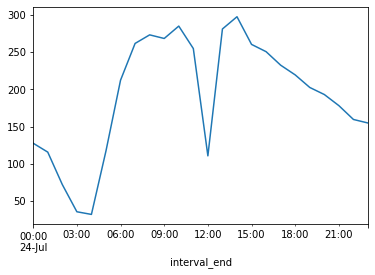

In [161]:
temp_check.set_index('interval_end')['kWh'].plot()

In [299]:
def hourly_resample(variable_interval_df):
    """
    Given a DataFrame of interval data with intervals of both 900 and 3600,
    return a properly resampled DataFrame at hourly intervals.
    """
    site_id = variable_interval_df['site_id'][0]
    short_interval_df = variable_interval_df.loc[variable_interval_df['interval_width'] == 900]
    short_interval_df = short_interval_df[['avg_kW', 'interval_end']].set_index('interval_end', drop=True)
    long_interval_df = variable_interval_df.loc[variable_interval_df['interval_width'] == 3600]
    long_interval_df = long_interval_df[['avg_kW', 'interval_end']].set_index('interval_end', drop=True)
    # to handle the fact that pandas resample interprets intervals
    # as insterval starts as opposed to the provided interval ends,
    # the time series needs to be shifted before resampling
    short_interval_df = short_interval_df.shift(-1, axis=0)
    short_interval_df.dropna(inplace=True)
    short_interval_df = short_interval_df.resample('H').mean()
    short_interval_df.dropna(inplace=True)
    # reconstructing the DataFrame
    resampled_df = pd.concat([short_interval_df, long_interval_df])
    resampled_df.sort_index(inplace=True)
    resampled_df['interval_end'] = resampled_df.index
    resampled_df['interval_width'] = 3600
    resampled_df['site_id'] = site_id
    return resampled_df

In [319]:
def week_near_base_peak_load(week_ts, near_base_pctl = 2.5, near_peak_pctl = 97.5):
    """
    Given a time series aggregated by day of week and sub-daily intervals,
    return columns with the near_base_load, and near_peak_load
    """
    week_ts['near_base_load'] = 0
    week_ts['near_peak_load'] = 0
    days = week_ts.index.get_level_values(0).unique()
    for day in days:
        week_ts.loc[(day, ), 'near_base_load'] = np.percentile(week_ts.loc[(day, ), 'avg_kW'], NEAR_BASE_PCTL)
        week_ts.loc[(day, ), 'near_peak_load'] = np.percentile(week_ts.loc[(day, ), 'avg_kW'], NEAR_PK_PCTL)

In [186]:
def aggregate_week_ts(ts_df):
    """
    Given a time series DataFrame, return an aggregate
    time series spanning one week with the median value
    populated for each interval
    """
    # shifting all data such that the first data point is the 0-hour of its day
    # this allows grouping by day of week in a way that retains the ability to
    # only include full days of data in the analysis, but still retain most days
    # when the time series only includes a few days (or just 24-hours) of data
    # that may not align with a full day
    init_time = ts_df['interval_end'][0]
    shifted_time = init_time.replace(hour=0, minute=0, second=0)
    time_shift = shifted_time - init_time
    ts_df['shifted_interval'] = ts_df['interval_end'] + time_shift
    # getting datetime parameters of interest for grouping
    ts_df['date'] = ts_df['shifted_interval'].dt.date
    ts_df['day_of_week'] = ts_df['shifted_interval'].dt.dayofweek
    ts_df['time_of_day'] = ts_df['shifted_interval'].dt.strftime('%H:%M:%S')
    #### this may not be necessary for load profiling, but is likely more important for DR ####
    ### REEVALUATE LATER ###
    # filtering out days without 24 hours of data
    width = ts_df['interval_width'][0]
    daily_intervals = 24 / (width / 3600)
    date_counts = ts_df['date'].value_counts()
    full_dates = date_counts.loc[date_counts == daily_intervals].index
    ts_df = ts_df.loc[ts_df['date'].isin(full_dates)]
    # performing the day of week and hour of day groupby
    week_df = ts_df[['avg_kW', 'day_of_week', 'time_of_day']].groupby(by=['day_of_week', 'time_of_day']).median()
    week_df['time_shifted'] = time_shift
    return week_df

In [187]:
temp_week = aggregate_week_ts(temp_ts)
temp_week

avg_kW      time_shifted
day_of_week time_of_day                          
0           00:00:00      90.48 -1 days +19:45:00
            00:15:00      91.80 -1 days +19:45:00
            00:30:00      90.60 -1 days +19:45:00
            00:45:00      87.60 -1 days +19:45:00
            01:00:00      87.00 -1 days +19:45:00
...                         ...               ...
6           22:45:00      96.00 -1 days +19:45:00
            23:00:00      94.35 -1 days +19:45:00
            23:15:00      93.60 -1 days +19:45:00
            23:30:00      92.70 -1 days +19:45:00
            23:45:00      91.95 -1 days +19:45:00

[672 rows x 2 columns]

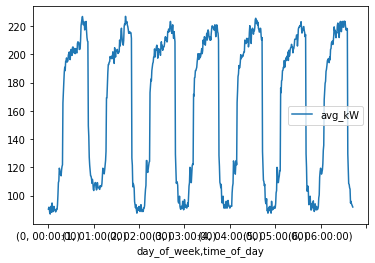

In [188]:
temp_week[['avg_kW']].plot()

In [316]:
operating_dict = {}
max_peak = temp_week['near_peak_load'].max()
min_base = temp_week['near_base_load'].min()
for day in range(0,7):
    daily_peak = temp_week.loc[(day, ), 'near_peak_load'][0]
    delta_daily_peak_max_peak = max_peak - daily_peak
    delta_daily_peak_min_base = daily_peak - min_base
    if delta_daily_peak_min_base < delta_daily_peak_max_peak:
        operating_dict.update({day: 0})
    else:
        operating_dict.update({day: 1})
operating_dict

def agg_week_operating_day(weekly_df, iter_index, ref_peak, ref_base):
    """
    Given a time series with a mult-index where the first index is the day of week,
    this function compares each day's near_peak_load against a reference near_base_load
    and near_peak_load to determine operating status based on whether the day's near_peak 
    is closer to a reference near_base (i.e. not operating)
    or is closer to a reference near_peak (i.e. operating).
    It may mis-identify days in which operation is significantly different than usual,
    or if only non-operating dates are present in the time series, or if the time series
    is relatively short but exhibits high variance within that time because 
    these scenarios make it difficult to determine appropriate reference points.
    """
    operating_dict = {}
    # create a dict of standard size to hold results with nan's as the default to
    # account for time series where less than a week of data is present
    for i in range(7):
        operating_dict.update({'dayofweek_'+str(i): np.nan})
    for day in iter_index:
        daily_peak = temp_week.loc[(day, ), 'near_peak_load'][0]
        delta_daily_peak_ref_peak = ref_peak - daily_peak
        delta_daily_peak_red_base = daily_peak - ref_base
        if delta_daily_peak_red_base < delta_daily_peak_ref_peak:
            operating_dict.update({'dayofweek_'+str(day): 0})
        else:
            operating_dict.update({'dayofweek_'+str(day): 1})
    return operating_dict

# what was ts_df for?

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1}

In [317]:
continuous_dict = {}
max_peak = temp_week['near_peak_load'].max()
min_base = temp_week['near_base_load'].min()
for day in range(0,7):
    daily_base = temp_week.loc[(day, ), 'near_base_load'][0]
    delta_daily_base_max_peak = max_peak - daily_base
    delta_daily_base_min_base = daily_base - min_base
    if delta_daily_base_min_base > delta_daily_base_max_peak:
        continuous_dict.update({day: 1})
    else:
        continuous_dict.update({day: 0})
continuous_dict

def agg_week_continuous_operation(weekly_df, operating_dict, ref_peak, ref_base):
    

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}

In [ ]:
## EVENTUAL MASTER FUNCTION
for site in site_list[0:5]:
    ops_metadata = pd.DataFrame()
    working_df = all_data_df.loc[all_data_df['site_id'] == site]
#     .copy()
    width = working_df['mean_interval_width'].mean()
    if width.is_integer():
        working_ts = working_df.set_index('interval_end', drop=False)
        working_ts.dropna(inplace=True)
    else:
        working_ts = hourly_resample(working_df)
        width = 3600
    # creating a weekly time series made up of the median for each time period
    working_week = aggregate_week_ts(working_ts)
    # calculating near_peak_load and near_base_load parameters
    working_week = week_near_base_peak_load(working_week)
    ref_peak = working_week['near_peak_load'].max()
    ref_base = working_week['near_base_load'].min()
    days_in_week = 
    site_ops_dict = agg_week_operating_day(working_week, iter_index, ref_peak, ref_base)
    
    ops_metadata = pd.concat[[ops_metadata, site_ops_metadata]]

In [263]:
temp_2_df = pd.read_sql_query("""SELECT "kWh"*(3600./interval_width) as "avg_kW", interval_end, interval_width, site_id from intervals where site_id='e7d819a2-4382-e7d1-a267-069c96a54333' order by interval_end asc;""", conn)

In [164]:
temp_df = pd.read_sql_query("""SELECT "kWh"*(3600./interval_width) as "avg_kW", interval_end, interval_width, site_id from intervals where site_id='811effd3-85a7-f36f-5eeb-cb38de38d5ac' order by interval_end asc;""", conn)
temp_df

,avg_kW,interval_end,interval_width,site_id
0,84.0,2017-06-21 04:15:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac
1,88.8,2017-06-21 04:30:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac
2,87.6,2017-06-21 04:45:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac
3,82.8,2017-06-21 05:00:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac
4,85.2,2017-06-21 05:15:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac
...,...,...,...,...
45883,110.4,2018-10-12 03:00:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac
45884,111.6,2018-10-12 03:15:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac
45885,109.2,2018-10-12 03:30:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac
45886,100.8,2018-10-12 03:45:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac


In [165]:
temp_ts = temp_df.set_index('interval_end', drop=False)

In [55]:
temp_ts['day_of_week'] = temp_ts['interval_end'].dt.dayofweek
temp_ts['time_of_day'] = temp_ts['interval_end'].dt.strftime('%H:%M:%S')
temp_ts.head(96)

,avg_kW,interval_end,interval_width,site_id,day_of_week,time_of_day
interval_end,,,,,,
2017-06-21 04:15:00,84.0,2017-06-21 04:15:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac,2,04:15:00
2017-06-21 04:30:00,88.8,2017-06-21 04:30:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac,2,04:30:00
2017-06-21 04:45:00,87.6,2017-06-21 04:45:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac,2,04:45:00
2017-06-21 05:00:00,82.8,2017-06-21 05:00:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac,2,05:00:00
2017-06-21 05:15:00,85.2,2017-06-21 05:15:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac,2,05:15:00
2017-06-21 05:30:00,93.6,2017-06-21 05:30:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac,2,05:30:00
2017-06-21 05:45:00,85.2,2017-06-21 05:45:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac,2,05:45:00
2017-06-21 06:00:00,85.2,2017-06-21 06:00:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac,2,06:00:00
2017-06-21 06:15:00,92.4,2017-06-21 06:15:00,900,811effd3-85a7-f36f-5eeb-cb38de38d5ac,2,06:15:00


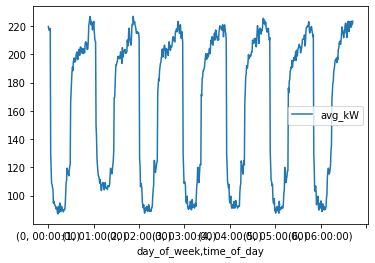

In [61]:
temp_ts[['avg_kW', 'day_of_week', 'time_of_day']].groupby(by=['day_of_week', 'time_of_day']).median().plot()

In [313]:
temp_week = temp_ts[['avg_kW', 'day_of_week', 'time_of_day']].groupby(by=['day_of_week', 'time_of_day']).median()

In [197]:
def high_load_start_stop(weekly_interval_df):
    """
    Given a DataFrame with known operating and not operating times,
    return the start and stop time for each day.
    """
    shift_forward_fill = weekly_interval_df['high_load_period'].iloc[-1]
    shift_backward_fill = weekly_interval_df['high_load_period'].iloc[0]
    weekly_interval_df['high_start'] = (weekly_interval_df['high_load_period']
                                        < weekly_interval_df['high_load_period'].shift(-1,
                                                                                       axis=0,
                                                                                       fill_value=shift_backward_fill))
    weekly_interval_df['high_stop'] = (weekly_interval_df['high_load_period']
                                       > weekly_interval_df['high_load_period'].shift(-1,
                                                                                      axis=0,
                                                                                      fill_value=shift_backward_fill))
    weekly_interval_df['high_start'] = weekly_interval_df['high_start'].astype('int')
    weekly_interval_df['high_stop'] = weekly_interval_df['high_stop'].astype('int')
    return weekly_interval_df

In [314]:
temp_week['near_base_load'] = 0
temp_week['near_peak_load'] = 0
temp_week['base_delta'] = 0
temp_week['peak_delta'] = 0
temp_week['high_load_period'] = 0
temp_week['high_start'] = 0
temp_week['high_stop'] = 0
for day in temp_week.index.get_level_values(0).unique():
    temp_week.loc[(day, ), 'near_base_load'] = np.percentile(temp_week.loc[(day, ), 'avg_kW'], 2.5)
    temp_week.loc[(day, ), 'near_peak_load'] = np.percentile(temp_week.loc[(day, ), 'avg_kW'], 97.5)
    temp_week.loc[(day, ), 'base_delta'] = temp_week.loc[:, 'avg_kW'] - temp_week.loc[:, 'near_base_load']
    temp_week.loc[(day, ), 'peak_delta'] = temp_week.loc[:, 'near_peak_load'] - temp_week.loc[:, 'avg_kW']
    temp_week.loc[(day, ), 'high_load_period'] = temp_week.loc[:, 'base_delta'] > temp_week.loc[:, 'peak_delta']

temp_week['high_load_period'] = temp_week['high_load_period'].astype('int')
temp_week = high_load_start_stop(temp_week)

In [315]:
temp_week.loc[(day, ), 'near_base_load'][0]
temp_week['near_peak_load'].max()

223.905

In [312]:
temp_week.index.get_level_values(0).unique()

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='day_of_week')

In [233]:
temp_week.near_base_load.unique()

array([ 88.3125, 104.4   ,  88.8   ,  90.57  ,  91.2   ,  89.025 ,
        90.    ])

In [234]:
temp_week.near_peak_load.unique()

array([223.905 , 223.155 , 220.35  , 219.6   , 223.7625, 220.0625,
       223.2   ])

In [318]:
temp_week.tail(96)

avg_kW  near_base_load  near_peak_load  base_delta  \
day_of_week time_of_day                                                       
6           00:00:00     214.95            90.0           223.2      124.95   
            00:15:00     216.40            90.0           223.2      126.40   
            00:30:00     217.20            90.0           223.2      127.20   
            00:45:00     219.40            90.0           223.2      129.40   
            01:00:00     219.60            90.0           223.2      129.60   
            01:15:00     216.80            90.0           223.2      126.80   
            01:30:00     215.16            90.0           223.2      125.16   
            01:45:00     212.40            90.0           223.2      122.40   
            02:00:00     213.90            90.0           223.2      123.90   
            02:15:00     129.60            90.0           223.2       39.60   
            02:30:00     120.00            90.0           223.2       30.00   
            02:45:00     103.20            90.0           223.2       13.20   
            03:00:00     103.20            90.0           223.2       13.20   
            03:15:00     106.80            90.0           223.2       16.80   
            03:30:00     103.20            90.0           223.2       13.20   
            03:45:00      93.60            90.0           223.2        3.60   
            04:00:00      97.20            90.0           223.2        7.20   
            04:15:00      96.40            90.0           223.2        6.40   
            04:30:00      99.60            90.0           223.2        9.60   
            04:45:00      93.60            90.0           223.2        3.60   
            05:00:00      89.80            90.0           223.2       -0.20   
            05:15:00      90.12            90.0           223.2        0.12   
            05:30:00      93.60            90.0           223.2        3.60   
            05:45:00      94.80            90.0           223.2        4.80   
            06:00:00      91.44            90.0           223.2        1.44   
            06:15:00      96.30            90.0           223.2        6.30   
            06:30:00      91.20            90.0           223.2        1.20   
            06:45:00      88.80            90.0           223.2       -1.20   
            07:00:00      90.00            90.0           223.2        0.00   
            07:15:00      94.20            90.0           223.2        4.20   
            07:30:00      90.84            90.0           223.2        0.84   
            07:45:00      90.00            90.0           223.2        0.00   
            08:00:00      92.40            90.0           223.2        2.40   
            08:15:00      90.00            90.0           223.2        0.00   
            08:30:00      90.36            90.0           223.2        0.36   
            08:45:00      90.54            90.0           223.2        0.54   
            09:00:00      92.10            90.0           223.2        2.10   
            09:15:00      98.40            90.0           223.2        8.40   
            09:30:00     100.50            90.0           223.2       10.50   
            09:45:00     113.10            90.0           223.2       23.10   
            10:00:00     117.00            90.0           223.2       27.00   
            10:15:00     119.40            90.0           223.2       29.40   
            10:30:00     117.90            90.0           223.2       27.90   
            10:45:00     115.20            90.0           223.2       25.20   
            11:00:00     116.40            90.0           223.2       26.40   
            11:15:00     118.20            90.0           223.2       28.20   
            11:30:00     122.40            90.0           223.2       32.40   
            11:45:00     132.00            90.0           223.2       42.00   
            12:00:00     135.60            90.0           223.2       45.60

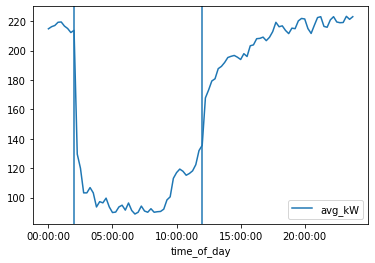

In [229]:
temp_week.loc[(6, ), ['avg_kW']].plot()
temp_start = temp_week.xs(6).loc[temp_week.xs(6).loc[:,'high_start'] == 1].index[0]
temp_start = list(temp_week.xs(6).index).index(temp_start)
temp_stop = temp_week.xs(6).loc[temp_week.xs(6).loc[:,'high_stop'] == 1].index[0]
temp_stop = list(temp_week.xs(6).index).index(temp_stop)
# print(temp_start, temp_stop)
plt.gca().axvline(temp_start)
plt.gca().axvline(temp_stop)
# ax = plt.gca() # get axis handle

# line = ax.lines[0] # get the first line, there might be more

# print(line.get_xdata())

In [ ]:
# calculating Load Shape Parameters based on literature from Lawrence Berkeley National Lab


In [84]:
np.percentile(temp_week.loc[temp_week.index.get_level_values(0) == 6, 'avg_kW'], 2.5)

90.0

# Identifying Data Gaps
I wanted to start with this problem because 1) the nature and frequency of the gaps may impact the algorithms used to solve other problems, and 2) I had the clearest initial idea for solving it.

In [189]:
all_gap_dates = functions.multi_site_gap_date_df(site_list)
all_gap_dates.to_csv('deliverables\gap_dates.csv', index=False)